In [153]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

# Bring in files and load into dataframe

In [154]:
states = input("Enter state: ")
states = states.lower()

Enter state: texas


In [155]:
path = f"C:/Users/Fiona/Documents/School/UofA Boot Camp/Github Repositories/COVID-19.io/data/{states}_data/{states}_master_file.csv"

In [156]:
master_df = pd.read_csv(path)
master_df = master_df[master_df.County != 'Unassigned']

# Format dataframe

In [157]:
import datetime as dt
master_df['Date'] = master_df['Date'].apply(pd.to_datetime)
master_df['Date'] = master_df['Date'].dt.strftime('%m/%d/%Y')

In [158]:
master_df.sort_values(by=['County','Date'], inplace=True)
master_df = master_df.drop(columns=['FIPS', 'State','Country','lat','lon','Active','Combined_Key'])
master_df = master_df.drop(columns=['Confirmed.1'])
master_df = master_df.dropna()

# Pivot dataframe for confirmed cases

In [159]:
try:
    master_df_confirmed = master_df.pivot(index=master_df.columns[0],
                  columns=master_df.columns[1],
                  values= master_df.columns[2])
except:
    master_df_confirmed = master_df.pivot_table(index='County', columns='Date', values='Confirmed')
dates_confirmed = list(master_df_confirmed.columns)
master_df_confirmed = master_df_confirmed.sort_values(by=dates_confirmed[-1], ascending=False)
master_df_confirmed = master_df_confirmed.dropna()
master_df_confirmed=master_df_confirmed[master_df_confirmed[dates_confirmed[-1]]!=0].dropna()
master_df_confirmed

Date,03/22/2020,03/23/2020,03/24/2020,03/25/2020,03/26/2020,03/27/2020,03/28/2020,03/29/2020
County,,,,,,,,
Harris,74.0,78.0,134.0,185.0,203.0,229.0,445.0,526.0
Dallas,131.0,155.0,169.0,247.0,303.0,367.0,439.0,488.0
Travis,62.0,79.0,86.0,98.0,119.0,160.0,179.0,200.0
Denton,30.0,30.0,38.0,51.0,83.0,137.0,148.0,165.0
Bexar,46.0,57.0,69.0,69.0,84.0,113.0,125.0,140.0
...,...,...,...,...,...,...,...,...
Franklin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Crane,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fayette,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Matplotlib for confirmed cases

In [160]:
filter_list = master_df_confirmed[dates_confirmed[-1]]
li_1 = []
li_5000 = []
li_200 = []
li_50 = []
li_min = []
li_zero = []
count = 0
for i in filter_list:
    if i == 0:
        li_zero.append(master_df_confirmed.iloc[count])
    elif i <= 10:
        li_min.append(master_df_confirmed.iloc[count])
    elif i <= 50:
        li_50.append(master_df_confirmed.iloc[count])
    elif i <= 300:
        li_200.append(master_df_confirmed.iloc[count])
    elif i <= 5000:
        li_5000.append(master_df_confirmed.iloc[count])
    else:
        li_1.append(master_df_confirmed.iloc[count])
    
        
    count+=1

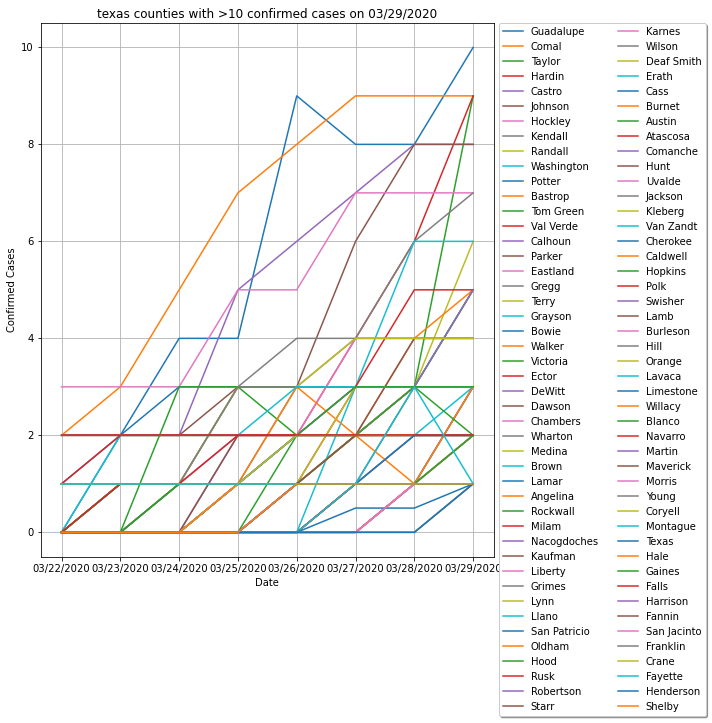

In [161]:
plt.figure(figsize=(10,10))
for i in li_min:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_confirmed_fig_1.png',dpi=200)

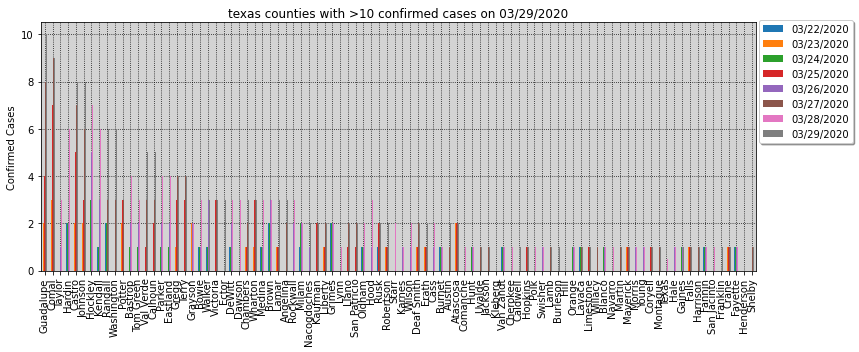

In [162]:
li_min_df = pd.DataFrame(li_min)
neww = li_min_df.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}")
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed1.png',dpi=200)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for i in li_50:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_confirmed_fig_2.png',dpi=200)

In [ ]:
li_50_df = pd.DataFrame(li_50)
neww = li_50_df.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}")
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed2.png',dpi=200)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
for i in li_200:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
plt.title(f"{states} counties with 50>300 confirmed cases on {dates_confirmed[-1]}")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_confirmed_fig_3.png',dpi=200)

In [ ]:
li_200_df = pd.DataFrame(li_200)
neww = li_200_df.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 50>300 confirmed cases on {dates_confirmed[-1]}")
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed3.png',dpi=200)
plt.show()

In [ ]:
if len(li_5000) != 0:
    plt.figure(figsize=(10,10))
    for i in li_5000:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
    plt.title(f"{states} counties with 300-5000 confirmed cases on {dates_confirmed[-1]}")
    plt.xlabel("Date")
    plt.ylabel("Confirmed Cases")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_4.png',dpi=200)

In [ ]:
if len(li_5000) != 0:
    li_5000_df = pd.DataFrame(li_5000)
    neww = li_5000_df.plot.bar(figsize=(12,5),zorder=2)
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
    plt.ylabel("Confirmed Cases")
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 300-5000 confirmed cases on {dates_confirmed[-1]}")
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed4.png',dpi=200)
    plt.show()

In [ ]:
if len(li_1) != 0:
    plt.figure(figsize=(10,10))
    for i in li_1:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01))
    plt.title(f"{states} counties with 5000+ confirmed cases on {dates_confirmed[-1]}")
    plt.xlabel("Date")
    plt.ylabel("Confirmed Cases")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_5.png',dpi=200)

In [ ]:
if len(li_1) != 0:
    li_1_df = pd.DataFrame(li_1)
    neww = li_1_df.plot.bar(figsize=(12,5),zorder=2)
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
    plt.ylabel("Confirmed Cases")
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 5000+ confirmed cases on {dates_confirmed[-1]}")
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed5.png',dpi=200)
    plt.show()

In [ ]:
neww = master_df_confirmed.plot.bar(figsize=(12,5),zorder=2)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.07, 1.03), ncol=1, fancybox=True, shadow=True)
plt.ylabel("Confirmed Cases")
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} confirmed cases - all counties")
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed.png',dpi=200)
plt.show()